

## Принятие решений в бизнесе (приоритезация гипотез и А/В тестирование)

## Описание проекта  
В рамках проекта необходимо приоритезировать подготовленные отделом маркетинга гипотезы, провести А/B тестирование и проанализировать результаты.  
**Ход исследования**  
**Первая часть** исследования посвящена приоретизации гипотез. В рамках исследования необходимо решить посталенные **задачи**: 
- отсортировать гипотезы по убыванию приоритета в соттветсвиии с результатми применения фреймворка ICE  
- отсортировать гипотезы по убыванию приоритета в соттветсвиии с результатми применения фреймворка RICE  
- зафикисировать изменения при приоретизации гипотез в рамках разных фреймворках, объяснить различия результатов, если они есть  


**Вторая часть** исследования - анализ результатов A/B теста. В рамках второй части будет решено **14 последовательных задач**:
    
  1 График кумулятивной выручки по группам

  2 График кумулятивного среднего чека по группам
    
  3 График относительного изменения кумулятивного среднего чека группы B к группе A
    
  4 График кумулятивной конверсии по группам
  
  5 График относительного изменения кумулятивной конверсии группы B к группе A
    
  6 Точечный график количества заказов по пользователям
    
  7 Расчет 95-й и 99-й перцентили количества заказов на пользователя
    
  8 Точечный график стоимостей заказов
  
  9 Расчет 95-й и 99-й перцентили стоимости заказов
    
  10 Расчет статистической значимости различий в конверсии между группами по «сырым» данным
    
  11 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
    
  12 Расчет статистической значимости различий в конверсии между группами по «очищенным» данным
    
  13 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
  
  14 Принятие решения по результатам теста
         


### Описание данных  
**Данные для первой части**  

Файл /datasets/hypothesis.csv  

•	Hypothesis — краткое описание гипотезы;  
•	Reach — охват пользователей по 10-балльной шкале;  
•	Impact — влияние на пользователей по 10-балльной шкале;  
•	Confidence — уверенность в гипотезе по 10-балльной шкале;  
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

**Данные для второй части**  

Файл /datasets/orders.csv.  

•	transactionId — идентификатор заказа;  
•	visitorId — идентификатор пользователя, совершившего заказ;  
•	date — дата, когда был совершён заказ;  
•	revenue — выручка заказа;  
•	group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.   

•	date — дата;  
•	group — группа A/B-теста;  
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста  


## Знакомство с данными  
### Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [3]:
try: #используем конструкцию try-except чтобы 100% прочитать файл
    hypothesis_data = pd.read_csv('C:/Users/Полинария/Downloads/hypothesis.csv', sep=',') #чтение локально
    orders_data = pd.read_csv('C:/Users/Полинария/Downloads/orders.csv', sep=',')
    visitors_data = pd.read_csv('C:/Users/Полинария/Downloads/visitors.csv', sep=',')
except:
    hypothesis_data = pd.read_csv('/datasets/hypothesis.csv', sep=',') #чтение файла на сервере
    orders_data = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors_data = pd.read_csv('/datasets/visitors.csv', sep=',')
display(hypothesis_data.head()) #знакомимся с данными
display(orders_data.head())
display(visitors_data.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Преобразование и проверка данных  
На прошлом шаге мы визуально познакомились с данными, сразу бросилось в глаза, что хочется поменять столбцы в таблице гипотез на названия со строчными буквами, кроме того посмотрим, сто нам покажет метод info() и проверим таблицы на пропуски и на дубликаты, чтобы убедиться, что можно начинать работу.

In [4]:
hypothesis_data.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'}, inplace = True)
orders_data.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)
display(hypothesis_data.columns) #проверяем
display(orders_data.columns)

orders_data['date'] = pd.to_datetime(orders_data['date']).dt.date #приводим к типу даты
visitors_data['date'] = pd.to_datetime(visitors_data['date']).dt.date

hypothesis_data.info() #посмотрим общую информацию о таблицах
orders_data.info()
visitors_data.info()

print(round((hypothesis_data.isna().mean()*100),2)) #перепроверим себя и посмотрим процент пропусков по столбцам
print(round((orders_data.isna().mean()*100),2))
print(round((visitors_data.isna().mean()*100),2))

print('Дубликатов в таблице с гипотезами выявлено:', hypothesis_data.duplicated().sum()) #убедимся, что в таблицах нет дубликатов
print('Дубликатов в таблице заказов выявлено:', orders_data.duplicated().sum())
print('Дубликатов в таблице посетителей выявлено:', visitors_data.duplicated().sum())

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns)

###   Выводы по шагу:
Данные считаны и подготовлены к дальнейшей работе: дубликатов нет, пропусков нет, типы данных приведены в нужный для последующего анализа вид, столбцы переименованы в сооответвии с общепринятыми правилами по оформлению.

## Приоретизация гипотез
### Приоретизация по фреймворку ICE
Проведем приоретизацию гипотез. Общая оценка по фреймворку ICE считается как отношение произведения баллов за параметры Impact и Confidence к параметру Efforts:

In [5]:
hypothesis_data['ICE'] = (
    (hypothesis_data['impact'] * hypothesis_data['confidence']) / hypothesis_data['efforts'])
pd.set_option('display.max_columns', None) 
pd.options.display.max_colwidth = 150 
hypothesis_data[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы - 8, 0 и 7. Остальные гипотезы уже слишком сильно уступают (например 6ая, которая на 4ом месте имеет менее половины ценности топ-1 гипотезы).  
### Приоретизация по фреймворку RICE  
Посмотрим изменится ли что нибудь, если мы используем другой метод определения наиболее перспективных гипотез. Общая оценка по фреймворку RICE считается почти также как ICE, но в числителе в произведение добавляется еще параметр Reach:

In [6]:
hypothesis_data['RICE'] = (
    (hypothesis_data['reach'] * hypothesis_data['impact'] * hypothesis_data['confidence']) / hypothesis_data['efforts'])

hypothesis_data[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Приоретизация гипотез. Выводы:

In [7]:
hypothesis_data[['hypothesis','ICE','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Несмотря на то, что топ-5 остался прежним (ну хоть почти половину отсекли!) внутри топ-5 все переигралось. Это связано с тем, что фреймворк RICE учитывает параметр Reach, который отвечает за охват. Таким образом мы понимаем, что если говорить о топ-5, то изменения, предложенные в гипотезах 7, 2 и 0 коснуться большего количества пользователей, чем 8, которая лидировала по фреймворку RICE.  
При выборе гипотезы, как мне кажется, стоит отталкиваться от задачи, которую мы перед собой ставим. Таким образом если нас волнует охват, то стоит обратиться к фреймворку RICE, однако если нас волнует то насколько сильно например гипотеза повлияет на определенный сегмент, мы его знаем и охват нас не волнует, то лучше обратиться к фреймворку ICE.  


## Анализ A/B теста
#### Определение дат начала и окончания теста, проверка на пересечения  
Проверим временной интервал и сразу же посмотрим есть ли пересечения в группах:

In [8]:
display(visitors_data.groupby('group').agg({'date':'first'}))
display(visitors_data.groupby('group').agg({'date':'last'}))
display(orders_data.groupby(['visitor_id']) #группируем по айди
       .agg({'group':'nunique'}) #считаем количество групп для каждого айди
       .query('group > 1')  #выводим результат, где групп больше 1
       .sum()
) #выводим общее количество

display(orders_data['visitor_id'].nunique())

,date
group,
A,2019-08-01
B,2019-08-01


,date
group,
A,2019-08-31
B,2019-08-31


group    116
dtype: int64

1031


Мы определили временной интервал теста: август 2019 года. Что касается пересекающихся пользователей они составляют около 10% от общего количества испытуемых. Однако мне кажется, что если у нас есть transaction_id мы точно знаем куда именно отнести покупку к группе А или Б. Я не знаю какую гипотезу проверяли в рамках теста, но знание об этом помогло бы сделать более точные выводы о том, будут эти 10% репрезентативными или наоборот будуь искажать результат. В данном случае нам важна конверсия и средний чек, которые мы сможем определить по transaction_id поэтому не хочется отказываться от 10% итак небольшого датасета.</div> 

#### Проверка гипотезы о равенстве долей
Прежде всего перед анализом результатов А/В теста проверим гипотезу о равенстве долей (группа А и группа В):

In [9]:
display(orders_data.groupby('group').agg({'visitor_id':'nunique'})) # смотрим количество покупателей в группах
display(visitors_data.groupby('group').agg({'visitors':'sum'})) # смотрим количество поситителей в группах

,visitor_id
group,
A,503
B,586


,visitors
group,
A,18736
B,18916


На глазок ничего не получится сказать о равенстве долей, поэтому приступим к проверке гипотезы о том, что доли равны:

In [10]:
alpha = 0.05 # критический уровень статистической значимости



purchases = np.array([orders_data.query('group == "A"')['visitor_id'].nunique(), orders_data.query('group == "B"')['visitor_id'].nunique()])
leads = np.array([visitors_data.query('group == "A"')['visitors'].sum(), visitors_data.query('group == "B"')['visitors'].sum()])

p1 = purchases[0]/leads[0] #пропорции покупок в разрезе по группам
p2 = purchases[1]/leads[1]

p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1]) #пропорция покупок в комбинированном датасете
difference = p1 - p2 #разница пропорций

z_value = difference / mt.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1])) # считаем статистику в ст.отклонениях стандартного нормального распределения
distr = st.norm(0, 1) # задаем стандартное нормальное распределение 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.016744645350056153
Отвергаем нулевую гипотезу: между долями есть значимая разница


Получается, что разница конверсии регистраций в заказ есть.  
#### Проверка распредления ежедневного количества посетителей на нормальность
Перед тием как переходить к чек листу проделаем еще одну замечательную вещь, проверим, нормально ли распределено ежедневное количество поситителей, для этого применим критерий Шапиро-Уилка: 

In [11]:
temp = visitors_data['visitors'].values #делаем список значений переменной, которая отраждает количество ежедневных пользователей
#display(temp) #проверка
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(temp)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.002020221436396241
Отвергаем нулевую гипотезу: распределение не нормально


Вот досада! Получается в данных есть большие выбросы :С А что если нам теперь провести непараметрический тест Уилкоксона-Манна-Уитни, вдруг он нам подскажет, покупают пользователи из группы В больше или нет.
#### Непараметрический тест. Критерий Манна-Уитни.

Сформулируем нулевую гипотезу: средние чеки группы А и группы В равны.</div> 

In [12]:
sales_a = orders_data.query('group =="A"')['revenue'].values #формируем массив данных
sales_b = orders_data.query('group =="B"')['revenue'].values

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sales_a, sales_b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Опять досада, вывод о различии сделать нельзя, значит мы не можем сказать, покупают ли пользователи из какой то группы лучше или нет, а значит и не можем оценить результаты А/В тестирования. Чтож видимо приступаем к нашему чек-листу из описания проекта.  

### Кумулятивная выручка по группам
Чтобы построить графики, нужно собрать кумулятивные данные. Поэтому соберем датасет cumulative_data со столбцами:   
•	date — дата;  
•	group — группа A/B-теста (A или B);  
•	orders — кумулятивное количество заказов на указанную дату в указанной группе;  
•	buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;  
•	revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);  
•	visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.  


In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_data[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors_data[np.logical_and(visitors_data['date'] <= x['date'], visitors_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))


         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


Теперь мы можем построить графики кумулятивной выручки по дням и группам:

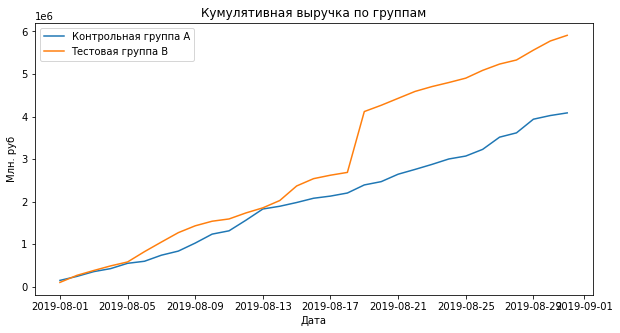

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5)) #задаем размер графика, чтобы было видно даты

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Млн. руб')
plt.legend(['Контрольная группа А', 'Тестовая группа В'])

plt.show() 


В каждой группе выручка почти равномерно увеличивается. Однако в графике группы В есть точка, где выручка резко растет. Скорее всего это свидетельство либо большого всплеска заказов, либо, что на мой взгляд более логично, появлении очень дорогого заказа в выборке. Чтож по чек листу работа с выбросами нам предстоит далее. А пок ане будем слишком забегать вперед и построим график кумулятивного среднего чека.
### Кумулятивный средний чек по группам
Тут все просто: чтобы получить средний чек разделим кумулятивную выручку, на кумулятивное число заказов:

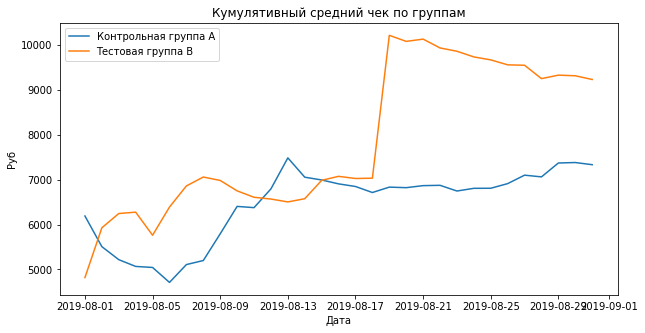

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Руб')
plt.legend(['Контрольная группа А', 'Тестовая группа В']) 
plt.show()

Воу, если средний чек группы А после довольно резкого подъема вроде как устаканился, то средний чек группы В резко вырос и демонтрирует тенденцию к снижению, а продолжилась бы она, если бы тест проводился дольше? Ответим на эти вопросы чуть позже, а пока построим график
### График относительного различия для среднего чека групп А и В

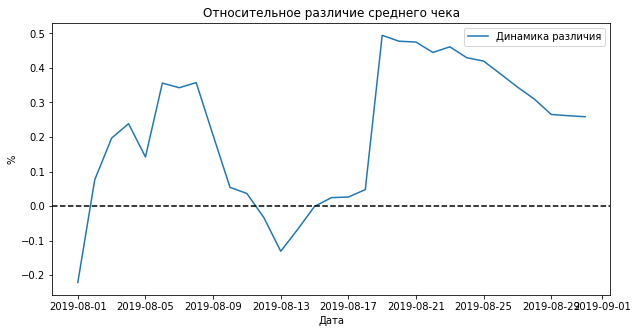

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5)) 
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие среднего чека')
plt.xlabel('Дата')
plt.ylabel('%')
plt.legend(['Динамика различия'])
plt.show()

У графика есть пики, которые могут свидетесьтвовать о выбросах. Влюбом случае, пока что практически все время средний чек группы В выше. 
### График кумулятивной конверсии

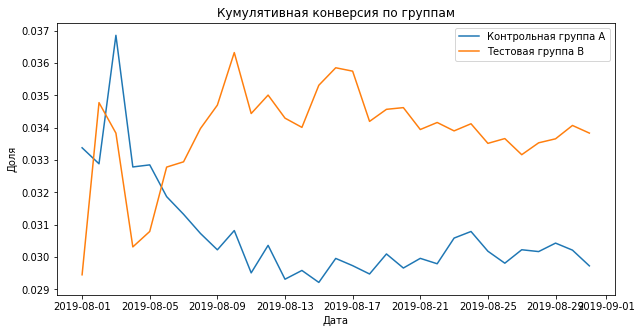

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10, 5)) 
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.legend(['Контрольная группа А', 'Тестовая группа В'])
plt.show()


Сначала лидировала группа А, но оооочень не долго, группа В вырвалась и удерживает преимущество.
### График относительного различия кумулятивных конверсий

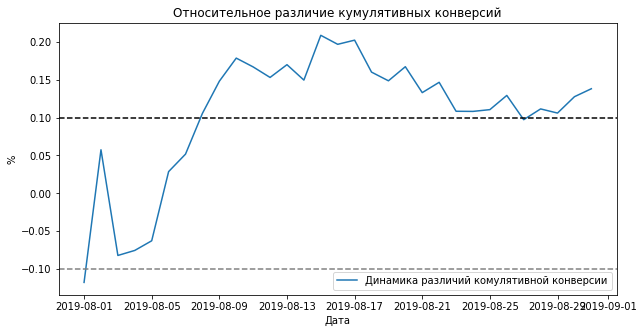

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.ylabel('%')
plt.legend(['Динамика различий комулятивной конверсии'])
plt.show() 


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но послдение данные говорят о постепенном росте. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать выбросы, возможно, они изменят картину. 
### Точечный график количества заказов по пользователям  
Сначала подсчитаем количество заказов по пользователям: 

In [18]:
ordersByUsers = (
    orders_data.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершают больше заказаов чем остальные. Чтож время точечного графика:

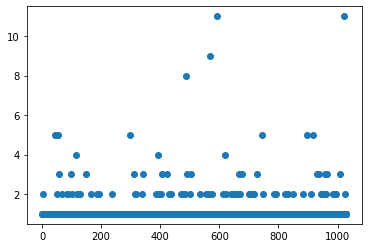

In [19]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Догадки подтверждаются, подавляющее большиснтво пользователей делают 1-3 заказа, ну никак не 11. Перцентили - ваш выход!
### 95-й и 99-й перцентили количества заказов на пользователя

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше 2х заказов и не более 1 % больше 4. Будем определять границу по 2м заказам.
### Точечный график стоимостей заказов 

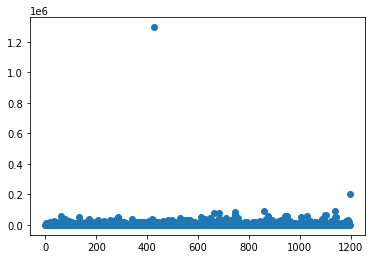

In [21]:
x_values = pd.Series(range(0,len(orders_data['revenue'])))
plt.scatter(x_values, orders_data['revenue'])
plt.show()

Мы догадывались, что есть выбросы (ух ты, на глазок целых 2 очевидных!), кроме того сразу видно один ооооочень дорогой заказ, который кстати и мог повлечь за собой пики в графиках группы В. Пора переходить к процентилям, чтобы отсеять "лишнее".
### 95-й и 99-й перцентили среднего чека

In [22]:
print(np.percentile(orders_data['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей совершили заказы дороже 28000. Это и будет нашей границей.
### Cтатистическая значимость различий в конверсии между группами по «сырым» данным
Прежде всего сформулируем гипотезы. H0 - различий в конверсии между группами НЕТ, то есть так как нулевая гипотеза со знаком равно грубо говоря: конверсия в группе А равна конверсии в группе В. Н1, или альтернативная - конверсии в группах не равны, то есть различия в конверсии между группами есть.  


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [24]:
ordersByUsersA = (
    orders_data[orders_data['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders_data[orders_data['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']
display(ordersByUsersA.sample(2))

,visitor_id,orders
83,787824685,1
222,1957949546,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни:

In [25]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors_data.query('group == "A"')['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors_data.query('group == "B"')['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

display(sampleA.sample(2))

13596    0
8878     0
Name: orders, dtype: int64

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой

In [26]:
print('p-value равно:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительная разница конверсий:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value равно: 0.017
Относительная разница конверсий: 0.138


P-value меньше 0,05, значит мы отвергаем нудевую гипотезу о равенстве конверсий. Разница между группами в пользу группы В достигает практически 14%.
### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
Посмотрим еще статистическую значимость различий в среднем чеке, нудева гипотеза - различий в среднем чеке нет. Чтобы посчитать передадим критерию данные о выручке с заказов:

In [27]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]))
print('Относительная разница среднего чека','{0:.3f}'.format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительная разница среднего чека 0.259


P-value значительно больше 0,05, значит статистически значимых различий в среднем чеке - нет, то есть средниче чеки условно равны. Однако, разница чека в пользу группы В достигает почти 26%, а это больше четверти (внушительно). Предположим что при такой большой разнице гипотеза о равенстве среднего чека не опровергнута из-за аномально дорогих заказов - мы успеем проверить это далее. 
Перейдем к проверке очищенных данных.



### Cтатистическая значимость различий в конверсии между группами по "очищенным" данным
Напомним, что найденные 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape():

In [28]:
X = np.percentile(ordersByUsers['orders'], [95,98,99])[1]
Y = np.percentile(orders_data['revenue'], [95,99])[0]
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > X]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > X]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_data[orders_data['revenue'] > Y]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Аномальных пользователей выявлено:', abnormalUsers.shape[0])


1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
Аномальных пользователей выявлено: 63


Теперь узхнаем как действия 86 пользователей повлияли на результаты нашего А/В тестирования - снова посчитаем статистическую значимость различий в конверсии между группами теста. Прежде всего заново подготовим выборки:

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
display(sampleAFiltered.sample(2))

17909    0
7658     0
Name: orders, dtype: int64

Применим статистический критерий Манна-Уитни к полученным срезам:

In [30]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.018
0.148


P-value увеличился, однако все еще недостаточно, чтобы достигнуть статистической значимости в 0,05. Значит нулевая гипотеза все таки отвергнута и разница между конверсиями есть.
Посмотрим изменилось ли что то по среднему чеку:
### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным


In [31]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders_data[
                np.logical_and(
                    orders_data['group'] == 'A',
                    np.logical_not(orders_data['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_data[
                np.logical_and(
                    orders_data['group'] == 'B',
                    np.logical_not(orders_data['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders_data[
            np.logical_and(
                orders_data['group'] == 'B',
                np.logical_not(orders_data['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_data[
            np.logical_and(
                orders_data['group'] == 'A',
                np.logical_not(orders_data['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.977
-0.017


P-value значительно больше порога в 0,05, значит нулевую гипотезу о том, что средний чек одинаковый принимаем. После удаления аномальных заказов стало понятно, что разница в среднем чеке не 26%, а всего лишь 0,2%.

### Выводы по результатам А/В теста

Результатом анализа А/В теста стали следующие факты:
•	Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий    
•   Статистически значимое различие среднего чека между группами нет, как в сырых данных, так и в очищенных, то есть средний чек в обоих группах условно одинаковый  
•   Исходя из графика разницы конверсий между группами можно сделать вывод, что результаты группы В лучше, чем у группы А, несмотря на падение, к концу эксперимента они устаканиваются и снова начинают расти:  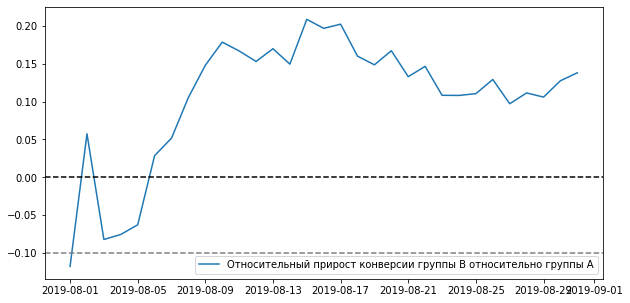  
•  График разницы среднего чека "штормит", однако когда во многом благодаря ему мы заметили аномалии, в любом случае статистической разницы в среднем чеке между группами нет.  

Исходя из фактов выше, тест следует остановить и признать успешным: при отсутсвии разницы в среднем чеке, конверсия группы В выше, чем конверсия группы А, значит гипотеза успешно проверена.